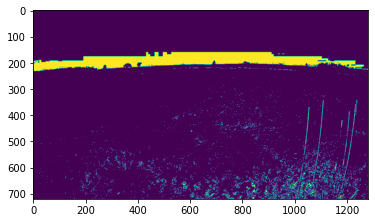

In [5]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
# import the necessary packages
from collections import deque
from imutils.video import VideoStream
# import numpy as np
import argparse
# import cv2
import imutils
import time

#add back in when taking out of notebook and to use command line args
# construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-v", "--video",
# 	help="path to the (optional) video file")
# ap.add_argument("-b", "--buffer", type=int, default=32,
# 	help="max buffer size")
# args = vars(ap.parse_args())

image_path = '/home/arnold/raindrop-detection-cnn/mesonet/20160420T221001_DELE.jpg'
rawImage = cv2.imread(image_path)
#large white color
hsv = cv2.cvtColor(rawImage, cv2.COLOR_BGR2HSV)
lower_white = np.array([0,0,180])
higher_white = np.array([255,255,255])
white_range = cv2.inRange(rawImage, lower_white, higher_white)

# cv2.imshow("White", white_range);cv2.waitKey(0);
plt.imshow(white_range)
plt.show()

In [4]:
#for video
# define the lower and upper boundaries of the "green"
# ball in the HSV color space
greenLower = (29, 86, 6)
greenUpper = (64, 255, 255)
# initialize the list of tracked points, the frame counter,
# and the coordinate deltas
pts = deque(maxlen=args["buffer"])
counter = 0
(dX, dY) = (0, 0)
direction = ""
# if a video path was not supplied, grab the reference
# to the webcam
if not args.get("video", False):
	vs = VideoStream(src=0).start()
# otherwise, grab a reference to the video file
else:
	vs = cv2.VideoCapture(args["video"])
# allow the camera or video file to warm up
time.sleep(2.0)

NameError: name 'args' is not defined

In [6]:
#to track frame by frame and process individually 
# keep looping
while True:
	# grab the current frame
	frame = vs.read()
	# handle the frame from VideoCapture or VideoStream
	frame = frame[1] if args.get("video", False) else frame
	# if we are viewing a video and we did not grab a frame,
	# then we have reached the end of the video
	if frame is None:
		break
	# resize the frame, blur it, and convert it to the HSV
	# color space
	frame = imutils.resize(frame, width=600)
	blurred = cv2.GaussianBlur(frame, (11, 11), 0)
	hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
	# construct a mask for the color "green", then perform
	# a series of dilations and erosions to remove any small
	# blobs left in the mask
	mask = cv2.inRange(hsv, greenLower, greenUpper)
	mask = cv2.erode(mask, None, iterations=2)
	mask = cv2.dilate(mask, None, iterations=2)
	# find contours in the mask and initialize the current
	# (x, y) center of the ball
	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
		cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	center = None

NameError: name 'vs' is not defined